# Info/CS 4300: Language and Information - in-class demo

# Proto Information Retrieval System

We're going to build a very basic proto-IR system from scratch.  In the first part we will preprocess the "documents" (in this case sentences from a Wikipedia article); in the second part we will implement a method for searching for the set of documents which are closest to a given query.

## Lecture: Basic text processing: sentences, types, tokens, similarity

In [3]:
from __future__ import print_function

In [4]:
import re

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
# Copy and pasted background info from the show's Wikipedia page
# (http://en.wikipedia.org/wiki/Keeping_Up_with_the_Kardashians)

background = u"""
Robert Kardashian (1944—2003) and Kristen Mary "Kris" Houghton (born 1955) married in 1978 and had four children together, daughters Kourtney (born 1979), Kim (born 1980), and Khloé, (born 1984), and son Rob (born 1987). The couple divorced in 1991.[3] In 1994, Robert entered the media spotlight when he defended O.J. Simpson for the murders of Nicole Brown Simpson and Ronald Goldman during a lengthy trial. Kris married former Olympic champion Bruce Jenner (born 1949) in 1991. Bruce and Kris had two daughters together, Kendall (born 1995) and Kylie (born 1997). Robert died in 2003 eight weeks after being diagnosed with esophageal cancer.[4] In 2004, Kim became a personal stylist to recording artist Brandy Norwood; she eventually developed into a full-time stylist, and was a personal shopper and stylist to actress Lindsay Lohan.[5] Khloé, Kim and Kourtney further ventured into fashion, opening a high fashion boutique D-A-S-H in Calabasas, California. Throughout Kim's early career, she involved herself in some high-profile relationships including Norwood's brother, rapper Ray J and later, singer Nick Lachey.[5] In 2006, Kourtney starred in her first reality television series, Filthy Rich: Cattle Drive.[6] In February 2007, a home sex video that Kim made with Ray J years earlier was leaked.[7] Vivid Entertainment bought the rights for $1 million and released the film as Kim Kardashian: Superstar on February 21.[7] Kim sued Vivid for ownership of the tape, but dropped the suit in April 2007 and settled with Vivid Entertainment for $5 million.[8]

In August 2007, it was announced that the Kardashians and Jenners would star in a yet-to-be-titled reality show on E!, with Ryan Seacrest serving as executive producer.[6] Seacrest said "At the heart of the series—despite the catfights and endless sarcasm—is a family that truly loves and supports one another [...] The familiar dynamics of this family make them one Hollywood bunch that is sure to entertain." The series announcement came one week after Paris Hilton and her friend Nicole Richie announced that their popular E! series entitled The Simple Life was ending.[6] Keeping Up With the Kardashians premiered on October 14, 2007.[9]

On November 13, 2007, it was announced that E! renewed the show for its second season.[9] The following year, it was renewed for a third season. Lisa Berger, executive vice president of original programming and series development for the network, said "viewers have embraced the Kardashian family and the series has become one of television's most-talked-about shows [...] We are fortunate to work with Seacrest and Bunim-Murray, which have an exceptional ability to capture the Kardashians' hilarious, chaotic and always entertaining personalities and family dynamics."[10] The Hollywood Reporter reported that the family made an estimated $65 million throughout 2010.[3]

In 2011, Kim married NBA player Kris Humphries in a highly publicized wedding ceremony,[11] but filed for divorce 72 days later.[12] This caused widespread backlash from the public and media.[13] Several news outlets surmised that Kardashian's marriage to Humphries was merely a publicity stunt, to promote the Kardashian family's brand and their subsequent television ventures.[14] A widely circulated petition asking to remove all Kardashian-related programming from the air has followed since their split.[15] As of December 2013, eight seasons of the series have aired. On April 24, 2012, E! signed a three-year deal with the Kardashian family that will keep the series airing through seasons seven, eight and nine.[16] The deal was estimated at $40 million.[17][18] On January. 4, 2015, a tenth season was announced to premiere on Feb 8, 2015 after the Kourtney and Khloé Take The Hamptons season finale.

The show revolves around the children of Kris Jenner, and originally focused on her children from her first marriage to deceased attorney Robert Kardashian: Kourtney, Kim, Khloé, and Rob Kourtney's boyfriend Scott Disick is a main character on the show. As the series progressed, Kris' children Kendall and Kylie also became recurring cast members of the show. Kris' second husband[19] 1976 Summer Olympics decathlon champion Bruce Jenner, is also frequently featured on the show, and has been a recurring cast member since the show began.
Since the series' premiere, the Kardashian sisters have established careers in the fashion industry, co-owning the fashion boutique D-A-S-H and launching several fragrances and clothing collections.
Kim gained notoriety as the subject of a sex tape in 2007, and later became involved in a relationship with New Orleans Saints running back Reggie Bush from 2007- March 2010.[20] In 2011, she received widespread criticism after filing for divorce from New Jersey Nets power forward Kris Humphries after a 72-day marriage. In 2012, while still married Kim became pregnant by rapper Kanye West; after suffering from preeclampsia she gave birth prematurely to their daughter North the following June.
Khloé attained notoriety in her own right after being arrested for driving under the influence in 2007, for which she was jailed for approximately three hours in 2008. The following year (during the fourth season), she married Los Angeles Lakers forward Lamar Odom after a one-month relationship. In 2012, she served as a co-host during the second season of the American version of The X Factor.
Rob launched the sock line "Arthur George" in 2012, and was involved in a relationship with singer Adrienne Bailon in the second and third seasons.
Kendall and Kylie have also established careers in the modeling industry.
In the eighth season, Bruce's sons Brandon and Brody Jenner, and Brandon's wife Leah Felder (daughter of Eagles band member Don Felder), were integrated into the supporting cast, while Kourtney, Khloé, and Kim's friends Malika Haqq and Jonathan Cheban joined the series in the second and third seasons.
The family earns an alleged total of $10 million per season of the series.[21]
"""

The simplest way to identify individual words is to split the string at every whitespace. 

In [7]:
background.split()

[u'Robert',
 u'Kardashian',
 u'(1944\u20142003)',
 u'and',
 u'Kristen',
 u'Mary',
 u'"Kris"',
 u'Houghton',
 u'(born',
 u'1955)',
 u'married',
 u'in',
 u'1978',
 u'and',
 u'had',
 u'four',
 u'children',
 u'together,',
 u'daughters',
 u'Kourtney',
 u'(born',
 u'1979),',
 u'Kim',
 u'(born',
 u'1980),',
 u'and',
 u'Khlo\xe9,',
 u'(born',
 u'1984),',
 u'and',
 u'son',
 u'Rob',
 u'(born',
 u'1987).',
 u'The',
 u'couple',
 u'divorced',
 u'in',
 u'1991.[3]',
 u'In',
 u'1994,',
 u'Robert',
 u'entered',
 u'the',
 u'media',
 u'spotlight',
 u'when',
 u'he',
 u'defended',
 u'O.J.',
 u'Simpson',
 u'for',
 u'the',
 u'murders',
 u'of',
 u'Nicole',
 u'Brown',
 u'Simpson',
 u'and',
 u'Ronald',
 u'Goldman',
 u'during',
 u'a',
 u'lengthy',
 u'trial.',
 u'Kris',
 u'married',
 u'former',
 u'Olympic',
 u'champion',
 u'Bruce',
 u'Jenner',
 u'(born',
 u'1949)',
 u'in',
 u'1991.',
 u'Bruce',
 u'and',
 u'Kris',
 u'had',
 u'two',
 u'daughters',
 u'together,',
 u'Kendall',
 u'(born',
 u'1995)',
 u'and',
 u'Kylie'

The output is not satisfactory, especially around punctuation. Let's try to catch a higher-level structure first: sentences. A simple idea is to break at periods.

In [8]:
background.split(".")

[u'\nRobert Kardashian (1944\u20142003) and Kristen Mary "Kris" Houghton (born 1955) married in 1978 and had four children together, daughters Kourtney (born 1979), Kim (born 1980), and Khlo\xe9, (born 1984), and son Rob (born 1987)',
 u' The couple divorced in 1991',
 u'[3] In 1994, Robert entered the media spotlight when he defended O',
 u'J',
 u' Simpson for the murders of Nicole Brown Simpson and Ronald Goldman during a lengthy trial',
 u' Kris married former Olympic champion Bruce Jenner (born 1949) in 1991',
 u' Bruce and Kris had two daughters together, Kendall (born 1995) and Kylie (born 1997)',
 u' Robert died in 2003 eight weeks after being diagnosed with esophageal cancer',
 u'[4] In 2004, Kim became a personal stylist to recording artist Brandy Norwood; she eventually developed into a full-time stylist, and was a personal shopper and stylist to actress Lindsay Lohan',
 u'[5] Khlo\xe9, Kim and Kourtney further ventured into fashion, opening a high fashion boutique D-A-S-H in

This is not perfect either. One problem consists of the Wikipedia footnotes such as "[9]", which are irrelevant to us. Let's remove them with a regular expression.

In [9]:
re.findall(r"\[\d+\]", background)

[u'[3]',
 u'[4]',
 u'[5]',
 u'[5]',
 u'[6]',
 u'[7]',
 u'[7]',
 u'[8]',
 u'[6]',
 u'[6]',
 u'[9]',
 u'[9]',
 u'[10]',
 u'[3]',
 u'[11]',
 u'[12]',
 u'[13]',
 u'[14]',
 u'[15]',
 u'[16]',
 u'[17]',
 u'[18]',
 u'[19]',
 u'[20]',
 u'[21]']

In [10]:
background_nofoot = re.sub(r"\[\d+\]", "", background)

We can now try to split sentences again. We also want to split on other punctuation marks, not just the period. This is possible with regular expressions.

In [11]:
splitter = re.compile(r"""
    [.!?]       # split on punctuation
    """, re.VERBOSE)

While this looks better, it messes up som instances: O.J. Simpson's name, the "E!" network's name, and ellipses (...).

To deal with this, we need to think about the decision process of whether a punctuation mark is an end of sentence or not.  In class, we came up with three requirements:

 - It is succeeded by at least one whitespace character (not `O.J`)
 - The first character after the whitespace should be uppercase (not `E! renewed`)
 - The last character before it should not be uppercase (not `J. Simpson`)
 
Are these rules complete?

In [12]:
#Note that we do not need to catch that last period, since we are using split

splitter = re.compile(r"""
    (?<![A-Z])  # last character cannot be uppercase
    [.!?]       # match punctuation
    \s+         # followed by whitespace
    (?=[A-Z])   # next character must be uppercase
    """, re.VERBOSE)

Running our sentence splitter on the text, it seems to do a good job.

In [13]:
for sentence in splitter.split(background_nofoot):
    print(sentence.strip())
    print("--")

Robert Kardashian (1944—2003) and Kristen Mary "Kris" Houghton (born 1955) married in 1978 and had four children together, daughters Kourtney (born 1979), Kim (born 1980), and Khloé, (born 1984), and son Rob (born 1987)
--
The couple divorced in 1991
--
In 1994, Robert entered the media spotlight when he defended O.J. Simpson for the murders of Nicole Brown Simpson and Ronald Goldman during a lengthy trial
--
Kris married former Olympic champion Bruce Jenner (born 1949) in 1991
--
Bruce and Kris had two daughters together, Kendall (born 1995) and Kylie (born 1997)
--
Robert died in 2003 eight weeks after being diagnosed with esophageal cancer
--
In 2004, Kim became a personal stylist to recording artist Brandy Norwood; she eventually developed into a full-time stylist, and was a personal shopper and stylist to actress Lindsay Lohan
--
Khloé, Kim and Kourtney further ventured into fashion, opening a high fashion boutique D-A-S-H in Calabasas, California
--
Throughout Kim's early career,

Now let's identify individual words within each sentence. Rather than splitting at whitespace, let's match all sequences of word characters.

In [14]:
word_splitter = re.compile(r"""
    (\w+)
    """, re.VERBOSE)

In [15]:
sent_words = [word_splitter.findall(sent)
              for sent in splitter.split(background_nofoot)]

In [16]:
sent_words_lower = [[w.lower() for w in sent]
                    for sent in sent_words]

How many sentences do we have?

In [17]:
len(sent_words_lower)

41

How many words are there in total? ("tokens")

In [18]:
allwords=[w for sent in sent_words_lower for w in sent]

In [19]:
sorted(allwords)

[u'1',
 u'10',
 u'13',
 u'14',
 u'1944',
 u'1949',
 u'1955',
 u'1976',
 u'1978',
 u'1979',
 u'1980',
 u'1984',
 u'1987',
 u'1991',
 u'1991',
 u'1994',
 u'1995',
 u'1997',
 u'2003',
 u'2003',
 u'2004',
 u'2006',
 u'2007',
 u'2007',
 u'2007',
 u'2007',
 u'2007',
 u'2007',
 u'2007',
 u'2007',
 u'2008',
 u'2010',
 u'2010',
 u'2011',
 u'2011',
 u'2012',
 u'2012',
 u'2012',
 u'2012',
 u'2013',
 u'2015',
 u'2015',
 u'21',
 u'24',
 u'4',
 u'40',
 u'5',
 u'65',
 u'72',
 u'72',
 u'8',
 u'a',
 u'a',
 u'a',
 u'a',
 u'a',
 u'a',
 u'a',
 u'a',
 u'a',
 u'a',
 u'a',
 u'a',
 u'a',
 u'a',
 u'a',
 u'a',
 u'a',
 u'a',
 u'a',
 u'a',
 u'a',
 u'a',
 u'a',
 u'a',
 u'ability',
 u'about',
 u'actress',
 u'adrienne',
 u'after',
 u'after',
 u'after',
 u'after',
 u'after',
 u'after',
 u'after',
 u'after',
 u'air',
 u'aired',
 u'airing',
 u'all',
 u'alleged',
 u'also',
 u'also',
 u'also',
 u'always',
 u'american',
 u'an',
 u'an',
 u'an',
 u'and',
 u'and',
 u'and',
 u'and',
 u'and',
 u'and',
 u'and',
 u'and',
 u'and'

In [20]:
len(allwords)

972

How many distinct types of words ("types") are there?

In [21]:
len(set(allwords))

459

In [22]:
sorted(set(allwords))

[u'1',
 u'10',
 u'13',
 u'14',
 u'1944',
 u'1949',
 u'1955',
 u'1976',
 u'1978',
 u'1979',
 u'1980',
 u'1984',
 u'1987',
 u'1991',
 u'1994',
 u'1995',
 u'1997',
 u'2003',
 u'2004',
 u'2006',
 u'2007',
 u'2008',
 u'2010',
 u'2011',
 u'2012',
 u'2013',
 u'2015',
 u'21',
 u'24',
 u'4',
 u'40',
 u'5',
 u'65',
 u'72',
 u'8',
 u'a',
 u'ability',
 u'about',
 u'actress',
 u'adrienne',
 u'after',
 u'air',
 u'aired',
 u'airing',
 u'all',
 u'alleged',
 u'also',
 u'always',
 u'american',
 u'an',
 u'and',
 u'angeles',
 u'announced',
 u'announcement',
 u'another',
 u'approximately',
 u'april',
 u'are',
 u'around',
 u'arrested',
 u'arthur',
 u'artist',
 u'as',
 u'asking',
 u'at',
 u'attained',
 u'attorney',
 u'august',
 u'back',
 u'backlash',
 u'bailon',
 u'band',
 u'be',
 u'became',
 u'become',
 u'been',
 u'began',
 u'being',
 u'berger',
 u'birth',
 u'born',
 u'bought',
 u'boutique',
 u'boyfriend',
 u'brand',
 u'brandon',
 u'brandy',
 u'brody',
 u'brother',
 u'brown',
 u'bruce',
 u'bunch',
 u'bunim'

## Answering queries on the data

We will try to retrieve the closest matching sentence to a given query. To do this, we must define what "closest" means. In other words, we need a similarity measure.

A simple one is the number of types in common between the query and the sentence.

In [23]:
def types_in_common(query_words, sentence):
    A = set(query_words)
    B = set(sentence)
    return len(A.intersection(B))

A slightly more complex one is the the Jaccard similarity measure, which additionaly takes into account the total number of types that the query and the sentence has.

In [24]:
def jaccard(query_words, sentence):
    A = set(query_words)
    B = set(sentence)
    return float(len(A.intersection(B)))/len(A.union(B))

Next we'll define a basic "search engine" which will go through all the sentences and calculate each one's similarity with the query.  It returns a list of sentences sorted by their similarity score (if that score is greater than zero).

To calculate the similarity, this function takes as an argument a similarity_measure function.

In [25]:
from operator import itemgetter

def run_search(query, similarity_measure):
    query_words = word_splitter.findall(query)
    query_words = [w.lower() for w in query_words]
    
    sent_scores = [(sent, similarity_measure(query_words, sent))
                   for sent in sent_words_lower]

    sent_scores = sorted(sent_scores, key=itemgetter(1), reverse=True)
    sent_scores = [(sent, score)
                   for sent, score in sent_scores
                   if score > 0]

    joined_sents = [(" ".join(sent), score) for sent, score in sent_scores]
    return joined_sents

Now we'll run two versions of the search engines (one using the types_in_commmon measure and one using the jaccard measure) for two different queries.

In [26]:
run_search("kris olympic",types_in_common)

[(u'kris married former olympic champion bruce jenner born 1949 in 1991', 2),
 (u'robert kardashian 1944 2003 and kristen mary kris houghton born 1955 married in 1978 and had four children together daughters kourtney born 1979 kim born 1980 and khlo born 1984 and son rob born 1987',
  1),
 (u'bruce and kris had two daughters together kendall born 1995 and kylie born 1997',
  1),
 (u'in 2011 kim married nba player kris humphries in a highly publicized wedding ceremony but filed for divorce 72 days later',
  1),
 (u'the show revolves around the children of kris jenner and originally focused on her children from her first marriage to deceased attorney robert kardashian kourtney kim khlo and rob kourtney s boyfriend scott disick is a main character on the show',
  1),
 (u'as the series progressed kris children kendall and kylie also became recurring cast members of the show',
  1),
 (u'kris second husband 1976 summer olympics decathlon champion bruce jenner is also frequently featured on t

In [27]:
run_search("kourtney",jaccard)

[(u'in 2006 kourtney starred in her first reality television series filthy rich cattle drive',
  0.07692307692307693),
 (u'khlo kim and kourtney further ventured into fashion opening a high fashion boutique d a s h in calabasas california',
  0.05555555555555555),
 (u'on january 4 2015 a tenth season was announced to premiere on feb 8 2015 after the kourtney and khlo take the hamptons season finale',
  0.047619047619047616),
 (u'robert kardashian 1944 2003 and kristen mary kris houghton born 1955 married in 1978 and had four children together daughters kourtney born 1979 kim born 1980 and khlo born 1984 and son rob born 1987',
  0.03571428571428571),
 (u'the show revolves around the children of kris jenner and originally focused on her children from her first marriage to deceased attorney robert kardashian kourtney kim khlo and rob kourtney s boyfriend scott disick is a main character on the show',
  0.030303030303030304),
 (u'in the eighth season bruce s sons brandon and brody jenner 

As we will be playing around with the internals of our information retrieval system, let's write a convenience function for displaying the results and highlighting the ones that we know are actually relevant for our information need.

In [28]:
def print_results(orderedlist, relevant_docs=[], maxresults=5):
    """Print search results while highlighting the ones we truly care about"""
    count = 1
    for item, score in orderedlist:
        if item in relevant_docs:
            print("{:d} !!! {:.2f} {}".format(count, score, item))
        elif count <= maxresults:
            print("{:d}     {:.2f} {}".format(count, score, item))
        print()
        count += 1

In [29]:
relevant_docs_champion = ["kris married former olympic champion bruce jenner born 1949 in 1991",
                          "kris second husband 1976 summer olympics decathlon champion bruce jenner is also frequently featured on the show and has been a recurring cast member since the show began"]

The Jaccard measure ranks a completely irrelevant document on #1, gets one right on #2, but the actual best document is all the way down on position 16.

In [30]:
print_results(run_search("the olympic champion in kardashians", jaccard),
              relevant_docs=relevant_docs_champion)

1     0.25 the couple divorced in 1991

2 !!! 0.23 kris married former olympic champion bruce jenner born 1949 in 1991

3     0.15 keeping up with the kardashians premiered on october 14 2007

4     0.14 kendall and kylie have also established careers in the modeling industry

5     0.10 in 2012 she served as a co host during the second season of the american version of the x factor











16 !!! 0.07 kris second husband 1976 summer olympics decathlon champion bruce jenner is also frequently featured on the show and has been a recurring cast member since the show began



























#Lecture 5: Vector Space Model

In order to have a more flexible system that we can modify, let's implement a vector space model. We will use term frequency (TF) weights in order to address one of the issues with Jaccard, namely, that if a word occurs more than once, it should naturally matter more.

In [31]:
terms = sorted(set(allwords))

# TF (term frequency) vectorization
# We represent vectors in a "sparse" dictionary format.
# All keys not present in the dictionary are assumed to be zeros.

def doc_to_vec(term_list):
    d = {}
    for v in terms:
        d[v] = term_list.count(v)
    return d

def query_to_vec(term_list):
    d = {}
    for v in terms:
        d[v] = term_list.count(v)
    return d

In [32]:
import math

def dot(d, q):
    sum=0
    for v in d:  # iterates through keys
        sum += d[v] * q[v]
    return sum

One simple similarity measure operating on vectors is the dot product. The higher the dot product between two vectors, the more similar they are.

In [33]:
def dot_measure(query_words, sentence):
    A = query_to_vec(query_words)
    B = doc_to_vec(sentence)
    return float(dot(A, B))

In [34]:
print_results(run_search("the olympic champion in kardashians",dot_measure),relevant_docs=relevant_docs_champion)

1     7.00 lisa berger executive vice president of original programming and series development for the network said viewers have embraced the kardashian family and the series has become one of television s most talked about shows we are fortunate to work with seacrest and bunim murray which have an exceptional ability to capture the kardashians hilarious chaotic and always entertaining personalities and family dynamics the hollywood reporter reported that the family made an estimated 65 million throughout 2010

2     6.00 seacrest said at the heart of the series despite the catfights and endless sarcasm is a family that truly loves and supports one another the familiar dynamics of this family make them one hollywood bunch that is sure to entertain the series announcement came one week after paris hilton and her friend nicole richie announced that their popular e series entitled the simple life was ending

3     6.00 in the eighth season bruce s sons brandon and brody jenner and brandon

We can see that this does even worse, as it rewards longer documents unfairly. We can address that by *length normalizing* the documents and the query, that is, dividing the vectors by their norm.

The resulting measure is the *cosine similarity* measure:

In [35]:
def norm(d):
    sum_sq = 0
    for v in d:
        sum_sq += d[v] * d[v]
    return math.sqrt(sum_sq)

def cos_measure(query_words, sentence):
    A = query_to_vec(query_words)
    B = doc_to_vec(sentence)
    return float(dot(A, B)) / (norm(A) * norm(B))



In [36]:
print_results(run_search("the olympic champion in kardashians",cos_measure),relevant_docs=relevant_docs_champion)

1 !!! 0.40 kris married former olympic champion bruce jenner born 1949 in 1991

2     0.40 the couple divorced in 1991

3     0.38 rob launched the sock line arthur george in 2012 and was involved in a relationship with singer adrienne bailon in the second and third seasons

4     0.34 in 2012 she served as a co host during the second season of the american version of the x factor

5     0.33 since the series premiere the kardashian sisters have established careers in the fashion industry co owning the fashion boutique d a s h and launching several fragrances and clothing collections










15 !!! 0.24 kris second husband 1976 summer olympics decathlon champion bruce jenner is also frequently featured on the show and has been a recurring cast member since the show began




























This already does better, ranking one of our important documents as first. The other is still low in the ranking.

Another issue we have at the moment is that all words matter equally, but intuition dictates that some words in the query (e.g. *olympic*) are more important than others (e.g. *in*).  A way to address this is to weight the words according to their *specificity*, and a concrete implementation is to use *inverse document frequency* (IDF)

In [37]:
IDF = {}
DF = {}

for t in terms:
    DF[t] = len([1 for sent in sent_words_lower if t in sent])
    IDF[t] = 1 / float(DF[t] + 1)

In [38]:
for IDF_t in sorted(IDF.items(), key=itemgetter(1),reverse = False)[:10]:
    print(IDF_t)

print("...")

for IDF_t in sorted(IDF.items(), key=itemgetter(1),reverse = False)[-10:]:
    print(IDF_t)

(u'the', 0.03225806451612903)
(u'and', 0.041666666666666664)
(u'in', 0.043478260869565216)
(u'a', 0.047619047619047616)
(u'kim', 0.07692307692307693)
(u'of', 0.08333333333333333)
(u'was', 0.08333333333333333)
(u'to', 0.1)
(u'series', 0.1)
(u'for', 0.1)
...
(u'cheban', 0.5)
(u'friends', 0.5)
(u'died', 0.5)
(u'vice', 0.5)
(u'2006', 0.5)
(u'2004', 0.5)
(u'time', 0.5)
(u'2008', 0.5)
(u'original', 0.5)
(u'simpson', 0.5)


In [39]:
##TF-IDF weights

def doc_to_vec(term_list):
    d = {}
    for v in terms:
        d[v] = term_list.count(v) * IDF[v]
    return d

def query_to_vec(term_list):
    d = {}
    for v in terms:
        d[v] = term_list.count(v) * IDF[v]
    return d

In [40]:
print_results(run_search("the olympic champion in kardashians",cos_measure),relevant_docs=relevant_docs_champion)

1 !!! 0.52 kris married former olympic champion bruce jenner born 1949 in 1991

2 !!! 0.10 kris second husband 1976 summer olympics decathlon champion bruce jenner is also frequently featured on the show and has been a recurring cast member since the show began

3     0.08 keeping up with the kardashians premiered on october 14 2007

4     0.06 in august 2007 it was announced that the kardashians and jenners would star in a yet to be titled reality show on e with ryan seacrest serving as executive producer

5     0.03 lisa berger executive vice president of original programming and series development for the network said viewers have embraced the kardashian family and the series has become one of television s most talked about shows we are fortunate to work with seacrest and bunim murray which have an exceptional ability to capture the kardashians hilarious chaotic and always entertaining personalities and family dynamics the hollywood reporter reported that the family made an estimate

With TF-IDF and cosine similarity, we now get both relevant documents ranked first and second in the returned list. Neat!

# Lecture- Efficient retrieval

So far we made good progress on improving our IR system along the "ease of access" dimension (basically, getting the most relevant results on top).  Now it's time to tackle about the scalability dimension:  making our IR system answer queries efficiently.

If we time the run of our measure, we see that it takes 40 milliseconds to process a query on our collection of only 41 (short documents).  If the run-time would increases linearly with the number of docs in the collection this would mean that in a web-scale collection of 1 billion documents, it would take us 11 1/2 days to run one search for a query!

***On the tv transcript collection from Assingment 1 (containing about 40,000 sentences) running a single query takes 11 minutes.***

In [41]:
%timeit a=run_search("the olympic champion in kardashians",cos_measure)

10 loops, best of 3: 30.6 ms per loop


Why so slow? let's look at our main data structure: the TERM-DOCUMENT matrix

In [42]:
for d in sent_words_lower:
    print (doc_to_vec(d).values())

[0.0, 0.0, 0.25, 0.0, 0.5, 0.25, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1111111111111111, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07692307692307693, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.14285714285714285, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

###Building an inverted index
    
The first step is to reorganize the way we store information about which terms appear in which documents.  Instead of storing a huge term-document martrix, we'll use an inverted index: a dictionary where each term links to a list that contains all unique document_ids of the documents in which it appears (a list of "postings").

Normaly this is implemented with linked lists, but for demonstrating the basic concept we will simply use regular lists.

In [43]:
from collections import defaultdict

docs=sent_words_lower

inverted_index=defaultdict(list)
for doc_idx, doc in enumerate(docs): # by iterating this way we make sure that doc_ids will always appear sorted in the postings
    for term in doc:
        if doc_idx not in inverted_index[term]: # this way we have unique doc_ids      
            inverted_index[term].append(doc_idx)  

In [44]:
for term in inverted_index.keys()[:20]:
    print (term,inverted_index[term])

all [22]
caused [20]
rob [0, 27, 37]
month [35]
four [0]
children [0, 27, 28]
relationships [8]
1949 [3]
paris [14]
1944 [0]
to [6, 13, 14, 18, 21, 22, 26, 27, 33]
under [34]
brown [2]
sons [39]
airing [24]
ending [14]
norwood [6, 8]
lohan [6]
bunim [18]
brother [8]


 Note that the document ids are sorted in all postings

### Posting merging algorithm for efficient boolean search

Now we'll see how we can use the inverted index to make an efficient conjunctive boolean search, i.e., search for all documents that contain two given terms.  This can be easily extended to conjunctive searches that span more than two terms, and to more general boolean searches that include disjunctive search.

The return merge posting will contain all the documents that contain both term1 and term2

In [45]:
def merge_postings(term1,term2):
    postings1=inverted_index[term1]
    postings2=inverted_index[term2]
    merged_posting=[]
    i,j=0,0
    while i<len(postings1) and j<len(postings2):
        if postings1[i]==postings2[j]:
            merged_posting.append(postings1[i])
            i+=1
            j+=1
        elif postings1[i]<postings2[j]:
            i+=1
        else:
            j+=1
    return merged_posting


All documents that contain both kim and kris:

In [46]:
merge_postings("kim","kris")

[0, 19, 27]

In [47]:
for doc_idx in merge_postings("kim","kris"):
    print (" ".join(docs[doc_idx]))
    print()

robert kardashian 1944 2003 and kristen mary kris houghton born 1955 married in 1978 and had four children together daughters kourtney born 1979 kim born 1980 and khlo born 1984 and son rob born 1987

in 2011 kim married nba player kris humphries in a highly publicized wedding ceremony but filed for divorce 72 days later

the show revolves around the children of kris jenner and originally focused on her children from her first marriage to deceased attorney robert kardashian kourtney kim khlo and rob kourtney s boyfriend scott disick is a main character on the show



# Efficient ranked retrieval  (using cosine similarity)

But our IR system is a ranked retrieval system using cosine similarity.  Next we'll show how we can use inverted indeces to re-implement it efficiently.

We first need to redefine the inverted indexes to also keep track of term frequencies:


In [48]:
## keep TF together with docs in the postings
docs=sent_words_lower
inverted_index=defaultdict(list)
for doc_idx, doc in enumerate(docs):
    for term in doc: 
# comment out this one, because now I want :
#        if doc_idx not in inverted_index[term]:
            inverted_index[term].append(doc_idx)
    
inverted_index_tf=defaultdict(list)

for term in inverted_index:
    postings=inverted_index[term]
    if len(postings)>0:
        lastdoc=-1
        i=0
        while i<len(postings):
            tf=0
            lastdoc=postings[i]
            while i<len(postings) and lastdoc==postings[i]:
                tf+=1
                lastdoc=postings[i]
                i+=1
            inverted_index_tf[term].append((lastdoc,tf))

        


In [49]:
for term in inverted_index_tf.keys()[:20]:
    print (term,inverted_index_tf[term])


all [(22, 1)]
caused [(20, 1)]
rob [(0, 1), (27, 1), (37, 1)]
month [(35, 1)]
four [(0, 1)]
children [(0, 1), (27, 2), (28, 1)]
relationships [(8, 1)]
1949 [(3, 1)]
paris [(14, 1)]
1944 [(0, 1)]
to [(6, 2), (13, 1), (14, 1), (18, 2), (21, 2), (22, 1), (26, 1), (27, 1), (33, 1)]
under [(34, 1)]
through [(24, 1)]
brown [(2, 1)]
sons [(39, 1)]
airing [(24, 1)]
defended [(2, 1)]
1994 [(2, 1)]
lohan [(6, 1)]
bunim [(18, 1)]


quick check: we have 3 documents containing "born", with 5, 1 and 2 ocurances of the term:

In [50]:
inverted_index_tf["born"]

[(0, 5), (3, 1), (4, 2)]

In [51]:
docs[0].count("born")

5

In [52]:
" ".join(docs[0])

u'robert kardashian 1944 2003 and kristen mary kris houghton born 1955 married in 1978 and had four children together daughters kourtney born 1979 kim born 1980 and khlo born 1984 and son rob born 1987'

### Cosine similarity with inverted index (with some shortcuts)

Now we define a method that searches for a query efficiently using the inverted index.  Our goal is to get the same results as before, but much more efficiently.  The main intuition is to use the indexes to go only through the douments that have a chance to be relevant.

Note that some of the implementation details are inefficient (efficient implementations are part of your assigment)

In [53]:
## let's use the TF-IDF weighting
def docweight(queryterm, tf):
    return tf*IDF[queryterm]

doc_norms={}
for doc_idx,doc in enumerate(docs):
    doc_norms[doc_idx]=norm(doc_to_vec(doc))  ## this can be done more efficiently, but I only do it once, so i don't care 

    
def run_search_on_index(query):
    query_words = word_splitter.findall(query)
    query_words = [w.lower() for w in query_words]
    query_weights_dict={}  ## precomputed nonzero query  weights
    large_vector=query_to_vec(query_words)
    for t in large_vector:
        if large_vector[t]>0:
            query_weights_dict[t]=large_vector[t]
      ##this can be done more efficiently

    ## these are the score accumulators
    ## they will accumulate accumulate TF-IDF weight products (w_iq * w_ij) 
    doc_scores=defaultdict(int)  
    
    ## since keys of our index are query words, we will iterate through those
    for queryterm in query_words:
        postings=inverted_index_tf[queryterm]
        for doc_idx,tf in postings:   ## only touching docs that are involved in the query
            weight_update=query_weights_dict[queryterm]*docweight(queryterm,tf)
            doc_scores[doc_idx]+=weight_update  ## accumulate TF-IDF updates here 
            ##(at the end of the outer loop, for each document that has any of these terms
            ##  we will have accumulated all TF-IDF weights that are needed to compute the 
            ## dot-product part of the cosine similarity score

    for d in doc_scores:
        doc_scores[d]=doc_scores[d]/(float(doc_norms[d])*float(norm(query_weights_dict)))  
        ## normalization part of the cosine similarity score
        ## same ORDER if you remove the query norm (every document is divided by it)
    
    doc_idx_scores = sorted(doc_scores.items(), key=itemgetter(1), reverse=True)  ##further optimization possible
    doc_scores = [(docs[doc_idx], score)
                   for doc_idx, score in doc_idx_scores
                   if score > 0]

    joined_sents = [(" ".join(sent), score) for sent, score in doc_scores]
    return joined_sents

***Now let's see if we get the same results as with the non-efficient calculation of cosine similarity:***


print_results(run_search_on_index("the olympic champion in kardashians"),relevant_docs=relevant_docs_champion)

We do (with the same scores):

In [54]:
print_results(run_search("the olympic champion in kardashians",cos_measure),relevant_docs=relevant_docs_champion)

1 !!! 0.52 kris married former olympic champion bruce jenner born 1949 in 1991

2 !!! 0.10 kris second husband 1976 summer olympics decathlon champion bruce jenner is also frequently featured on the show and has been a recurring cast member since the show began

3     0.08 keeping up with the kardashians premiered on october 14 2007

4     0.06 in august 2007 it was announced that the kardashians and jenners would star in a yet to be titled reality show on e with ryan seacrest serving as executive producer

5     0.03 lisa berger executive vice president of original programming and series development for the network said viewers have embraced the kardashian family and the series has become one of television s most talked about shows we are fortunate to work with seacrest and bunim murray which have an exceptional ability to capture the kardashians hilarious chaotic and always entertaining personalities and family dynamics the hollywood reporter reported that the family made an estimate

***And it is 50 times more efficient (on bigger collection, this efficiency gain is much bigger)***

In [55]:
%timeit a=run_search_on_index("the olympic champion in kardashians")

1000 loops, best of 3: 481 µs per loop


In [56]:
%timeit a=run_search("the olympic champion in kardashians",cos_measure)

10 loops, best of 3: 31.1 ms per loop


We can make this even more efficient if we realize that terms with very low idf scores will not affect the similarity score that much but will incur a high efficiency cost.  We will approximate the cos_similarity measure by removing terms that do not make it past a certain trashold.

We only add one line to the our "run_search_on_index" function:

In [57]:
## Only consider terms that have nontrivial IDF

def run_search_on_index(query):
    query_words = word_splitter.findall(query)
    query_words = [w.lower() for w in query_words]
    query_weights_dict={}  ## precomputed nonzero query  weights
    large_vector=query_to_vec(query_words)
    for t in large_vector:
        if large_vector[t]>0:
            query_weights_dict[t]=large_vector[t]

    doc_scores=defaultdict(int)
    for queryterm in query_words:
        if IDF[queryterm]>0.05:  
            # DOUBLE BENEFITS: 1) going through fewer postings, 2) we can cut these from the indexes too
            postings=inverted_index_tf[queryterm]
            for doc_idx,tf in postings: 
                weight_update=query_weights_dict[queryterm]*docweight(queryterm,tf)
                doc_scores[doc_idx]+=weight_update  

    for d in doc_scores:
        doc_scores[d]=doc_scores[d]/(float(doc_norms[d])*float(norm(query_weights_dict)))  ##same ORDER if you remove the last norm
    
    doc_idx_scores = sorted(doc_scores.items(), key=itemgetter(1), reverse=True)  ##further optimization possible
    doc_scores = [(docs[doc_idx], score)
                   for doc_idx, score in doc_idx_scores
                   if score > 0]

    joined_sents = [(" ".join(sent), score) for sent, score in doc_scores]
    return joined_sents





***Note that ordering stayed the same, cosine similarity scores changed just slightly, but we got further improvement in efficiency.***

In [59]:
print_results(run_search_on_index("the olympic champion in kardashians"),relevant_docs=relevant_docs_champion)

1 !!! 0.51 kris married former olympic champion bruce jenner born 1949 in 1991

2 !!! 0.10 kris second husband 1976 summer olympics decathlon champion bruce jenner is also frequently featured on the show and has been a recurring cast member since the show began

3     0.08 keeping up with the kardashians premiered on october 14 2007

4     0.05 in august 2007 it was announced that the kardashians and jenners would star in a yet to be titled reality show on e with ryan seacrest serving as executive producer

5     0.03 lisa berger executive vice president of original programming and series development for the network said viewers have embraced the kardashian family and the series has become one of television s most talked about shows we are fortunate to work with seacrest and bunim murray which have an exceptional ability to capture the kardashians hilarious chaotic and always entertaining personalities and family dynamics the hollywood reporter reported that the family made an estimate

In [60]:
%timeit a=run_search_on_index("the olympic champion in kardashians")

1000 loops, best of 3: 351 µs per loop


This boost in efficiency  becomes even more important when we have large collections of documents: ***On the tv transcript collection from Assgment 1 (containing about 40,000 sentences) running a single query using the old cosine similarity method takes 11 minutes. After this optimization step, running a query on that same collection takes only 8 miliseconds: that is 80,000 times faster!***

***Methodological note:*** To select the IDF treshhold (0.05 in this case) we can look at the IDF distribution in combination with the words that fall in different IDF buckets

(array([   5.,   15.,    9.,   11.,   27.,    0.,   60.,    0.,    0.,  332.]),
 array([ 0.03225806,  0.07903226,  0.12580645,  0.17258065,  0.21935484,
         0.26612903,  0.31290323,  0.35967742,  0.40645161,  0.45322581,
         0.5       ]),
 <a list of 10 Patch objects>)

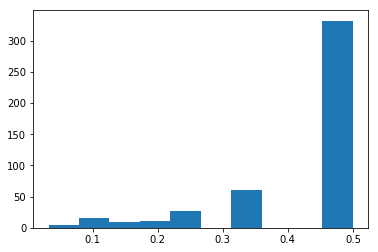

In [58]:
plt.hist(IDF.values())

In [61]:
for IDF_t in sorted(IDF.items(), key=itemgetter(1),reverse = False)[:10]:
    print(IDF_t)

print("...")

for IDF_t in sorted(IDF.items(), key=itemgetter(1),reverse = False)[-10:]:
    print(IDF_t)

(u'the', 0.03225806451612903)
(u'and', 0.041666666666666664)
(u'in', 0.043478260869565216)
(u'a', 0.047619047619047616)
(u'kim', 0.07692307692307693)
(u'of', 0.08333333333333333)
(u'was', 0.08333333333333333)
(u'to', 0.1)
(u'series', 0.1)
(u'for', 0.1)
...
(u'cheban', 0.5)
(u'friends', 0.5)
(u'died', 0.5)
(u'vice', 0.5)
(u'2006', 0.5)
(u'2004', 0.5)
(u'time', 0.5)
(u'2008', 0.5)
(u'original', 0.5)
(u'simpson', 0.5)
